# Machine Learning with Scikit-Learn

In this notebook we will be creating predictive models using our cleaned data from the ***Data Cleaning*** notebook.

In [1]:
# import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
# read in data
df = pd.read_csv('data/clean_data.csv')

In [3]:
# set option to see all columns
pd.set_option('display.max_columns', None)
# check
df.sample(5)

,winner_is_blue,is_title_bout,no_of_rounds,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,total_fight_time_secs,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_Overturned,finish_S-DEC,finish_SUB,finish_U-DEC,year,month,day,Australia,Brazil,Canada,Chile,China,Croatia,Czech Republic,Denmark,Germany,Ireland,Japan,Mexico,Netherlands,New Zealand,Philippines,Poland,Russia,Singapore,South Korea,Sweden,USA,United Arab Emirates,United Kingdom,Uruguay,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight,B_Orthodox,B_Southpaw,B_Switch,R_Orthodox,R_Southpaw,R_Switch,better_rank_Red,better_rank_neither,weight_dif,odds_dif,ev_dif,draw_dif,avg_SIG_STR_pct_dif,avg_TD_pct_dif,win_by_Decision_Majority_dif,win_by_Decision_Split_dif,win_by_Decision_Unanimous_dif,win_by_TKO_Doctor_Stoppage_dif
2176,1,0,3,0,-1,-1,-1,1,-6,0,0,0,-2.54,2.54,0,-36.500000,-0.500000,-1.500000,0,900.0,0,0,0,0,0,0,1,2015,12,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,310,84.393939,0,0.015000,-0.500000,0,0,-1,0
2610,0,0,3,-2,-1,0,-1,0,0,0,-1,0,-10.16,-15.24,-11,3.916667,-0.500000,1.666667,0,84.0,0,0,0,0,0,1,0,2015,1,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,240,33.076923,0,-0.110833,0.276667,0,0,0,0
2063,0,0,3,0,-1,-1,-1,0,-2,0,-1,0,0.00,-7.62,4,-25.000000,0.000000,0.000000,0,600.0,0,1,0,0,0,0,0,2016,4,10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,15,-300,-77.500000,0,-0.100000,0.000000,0,0,0,0
2851,1,0,3,1,0,-3,-5,2,-17,0,-1,-1,-5.08,-2.54,-3,-22.750000,-1.250000,-0.375000,0,900.0,0,0,0,0,0,0,1,2014,7,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,400,142.380952,0,0.053750,-0.092500,0,0,-3,0
1624,0,1,5,0,0,4,2,1,5,-1,0,0,7.62,2.54,0,20.266667,-0.222222,0.055556,0,1500.0,0,0,1,0,0,0,0,2017,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,-260,-48.571429,0,-0.072667,-0.039222,0,-1,3,0


As we mentioned in the data cleaning notebook the winning classes are imbalanced with the red corner fighters having a higher win count than the blue corner. Since we do not have much data and the balances are not that far off where we would be doubling or tripling our blue winners, it would be a good idea to oversample here to not lose any data.

In [4]:
# define our X and y
X = df.drop(['winner_is_blue'], axis = 1)
y = df['winner_is_blue']

In [5]:
# check imbalance
y.value_counts()

0    2541
1    1804
Name: winner_is_blue, dtype: int64

In [6]:
# import random over sampler
from imblearn.over_sampling import RandomOverSampler

In [7]:
# instantiate
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# check new balance
y_over.value_counts()

1    2541
0    2541
Name: winner_is_blue, dtype: int64

In [8]:
# create a new dataset from oversampling
df1 = pd.concat([X_over, y_over], axis=1)

In [9]:
#check
df1

,is_title_bout,no_of_rounds,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,total_fight_time_secs,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_Overturned,finish_S-DEC,finish_SUB,finish_U-DEC,year,month,day,Australia,Brazil,Canada,Chile,China,Croatia,Czech Republic,Denmark,Germany,Ireland,Japan,Mexico,Netherlands,New Zealand,Philippines,Poland,Russia,Singapore,South Korea,Sweden,USA,United Arab Emirates,United Kingdom,Uruguay,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight,B_Orthodox,B_Southpaw,B_Switch,R_Orthodox,R_Southpaw,R_Switch,better_rank_Red,better_rank_neither,weight_dif,odds_dif,ev_dif,draw_dif,avg_SIG_STR_pct_dif,avg_TD_pct_dif,win_by_Decision_Majority_dif,win_by_Decision_Split_dif,win_by_Decision_Unanimous_dif,win_by_TKO_Doctor_Stoppage_dif,winner_is_blue
0,0,5,1,0,1,9,4,63,9,2,-1,0.00,7.62,5,-1.690000,-0.800000,1.420000,1,900.000000,0,0,0,0,1,0,0,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,503,189.028777,1,-0.020000,0.100000,0,0,8,0,1
1,0,3,-1,0,1,1,0,6,0,1,0,2.54,20.32,-1,1.910000,0.000000,0.000000,1,665.128519,0,1,0,0,0,0,0,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,-428,-146.333333,0,0.130000,0.000000,0,0,0,0,1
2,0,3,3,-1,0,0,3,8,0,1,-1,0.00,2.54,8,-0.210000,-0.800000,0.390000,1,665.128519,0,1,0,0,0,0,0,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,2180,743.006993,0,-0.170000,0.250000,0,0,0,0,1
3,0,3,0,0,0,0,1,2,0,1,-1,0.00,5.08,2,-5.730000,-0.400000,-1.580000,1,665.128519,0,1,0,0,0,0,0,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,410,136.521739,0,-0.120000,0.170000,0,1,-1,0,0
4,0,3,0,0,0,0,-1,0,0,0,-1,-2.54,0.00,-7,-0.350000,-1.300000,-2.590000,1,900.000000,0,0,0,0,0,0,1,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,-10,-247,-37.007299,0,-0.190000,-1.000000,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5077,0,3,0,0,0,0,0,0,0,0,0,5.08,5.08,12,24.000000,0.000000,1.000000,0,236.000000,0,1,0,0,0,0,0,2014,5,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,-510,-207.264151,0,0.030000,1.000000,0,0,0,0,1
5078,0,3,1,0,-1,-1,1,-6,-1,0,-1,-12.70,-15.24,-4,-31.000000,-0.500000,-4.000000,0,900.000000,0,0,0,0,0,0,0,2016,9,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,260,48.571429,0,-0.090000,-0.420000,0,0,0,0,1
5079,0,5,0,1,3,13,-5,30,-1,6,6,7.62,7.62,-4,-9.350000,0.116667,0.033333,0,1500.000000,0,0,0,0,0,0,1,2019,5,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,240,33.076923,0,0.055000,0.090333,0,-1,2,0,1
5080,0,3,-2,-1,-4,-7,1,-16,0,-2,0,-5.08,-5.08,0,1.181818,-0.939394,1.393939,0,900.000000,0,0,0,0,0,0,1,2014,12,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,10,-440,-166.521739,0,0.179697,0.101818,0,-1,-4,0,1


Now that we have our winners balanced we can finally start putting our data into classification machine learning models and see how it performs. Let us first try a simple Logistic Classifier. Since a normal train-test-split would not really make sense in this case since it would be biased to predict fights already using data from future fights that had never happened at that time. Thus, it would be best to cut off a slice from the end of the dataframe filtering by years 2020 and 2019 for our test set. We also cannot do cross validation for the same reasons, so we would have to stick with one validation set which we can set as the fights in 2018.

In [10]:
#define test set
test_df = df1.loc[df1['year'] >= 2019].reset_index(drop=True)

# write it into csv 
test_df.to_csv('data/test.csv', index = False)

In [12]:
# collect remaining data
df = df1.loc[df1['year'] < 2019].reset_index(drop=True)

In [13]:
#check
df

,is_title_bout,no_of_rounds,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,total_fight_time_secs,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_Overturned,finish_S-DEC,finish_SUB,finish_U-DEC,year,month,day,Australia,Brazil,Canada,Chile,China,Croatia,Czech Republic,Denmark,Germany,Ireland,Japan,Mexico,Netherlands,New Zealand,Philippines,Poland,Russia,Singapore,South Korea,Sweden,USA,United Arab Emirates,United Kingdom,Uruguay,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight,B_Orthodox,B_Southpaw,B_Switch,R_Orthodox,R_Southpaw,R_Switch,better_rank_Red,better_rank_neither,weight_dif,odds_dif,ev_dif,draw_dif,avg_SIG_STR_pct_dif,avg_TD_pct_dif,win_by_Decision_Majority_dif,win_by_Decision_Split_dif,win_by_Decision_Unanimous_dif,win_by_TKO_Doctor_Stoppage_dif,winner_is_blue
0,1,5,1,2,-7,-6,-2,-20,-9,1,-3,2.54,-12.70,0,-16.214286,-0.198413,-0.714286,0,722.0,0,1,0,0,0,0,0,2018,12,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,535,210.517241,0,-0.180317,-0.251667,0,0,-4,0,0
1,1,5,0,2,2,4,-1,10,1,1,2,0.00,2.54,3,-26.600000,0.400000,0.500000,0,900.0,0,0,0,0,0,0,0,2018,12,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,385,127.380952,0,-0.054000,-0.118000,0,1,0,0,1
2,0,3,2,0,-2,0,4,-21,-2,-5,5,-2.54,0.00,3,-36.521212,0.060606,1.078788,0,356.0,0,0,0,0,0,1,0,2018,12,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,-10,-8.281574,0,0.011576,0.202364,0,-1,1,-1,1
3,0,3,0,0,0,1,-1,14,1,-1,-2,12.70,15.24,6,38.700000,-0.300000,3.333333,0,900.0,0,0,0,0,0,0,1,2018,12,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,240,33.076923,0,0.040167,0.192000,0,0,4,0,1
4,0,3,0,4,0,-4,4,-13,-3,-4,0,0.00,12.70,3,48.446154,0.446154,1.353846,0,554.0,0,1,0,0,0,0,0,2018,12,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,260,48.571429,0,0.052308,0.287231,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0,3,0,-1,-1,0,0,-5,0,0,1,-2.54,-12.70,8,-14.200000,0.400000,0.600000,0,283.0,0,0,0,0,0,1,0,2018,7,28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,-1050,-433.333333,0,0.102000,0.278000,0,-1,0,0,1
4175,0,3,0,0,0,0,0,0,0,0,0,5.08,5.08,12,24.000000,0.000000,1.000000,0,236.0,0,1,0,0,0,0,0,2014,5,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,-510,-207.264151,0,0.030000,1.000000,0,0,0,0,1
4176,0,3,1,0,-1,-1,1,-6,-1,0,-1,-12.70,-15.24,-4,-31.000000,-0.500000,-4.000000,0,900.0,0,0,0,0,0,0,0,2016,9,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,260,48.571429,0,-0.090000,-0.420000,0,0,0,0,1
4177,0,3,-2,-1,-4,-7,1,-16,0,-2,0,-5.08,-5.08,0,1.181818,-0.939394,1.393939,0,900.0,0,0,0,0,0,0,1,2014,12,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,10,-440,-166.521739,0,0.179697,0.101818,0,-1,-4,0,1


In [16]:
# validation data
validation_df = df.loc[df['year'] == 2018].reset_index(drop=True)

In [17]:
# train data
train_df = df.loc[df['year'] != 2018].reset_index(drop=True)

In [27]:
# create our X and y sets
X_train = train_df.drop(['winner_is_blue', 'total_fight_time_secs', 'finish_DQ', 'finish_KO/TKO', 'finish_M-DEC', 'finish_Overturned',
             'finish_S-DEC', 'finish_SUB', 'finish_U-DEC'], axis = 1)
y_train = train_df['winner_is_blue']

X_val = validation_df.drop(['winner_is_blue', 'total_fight_time_secs', 'finish_DQ', 'finish_KO/TKO', 'finish_M-DEC', 'finish_Overturned',
             'finish_S-DEC', 'finish_SUB', 'finish_U-DEC'], axis = 1)
y_val = validation_df['winner_is_blue']

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [31]:
C_range = np.array([.00001, .0001, .001, .1,
                    1, 10, 100, 1000, 10000, 100000])
accuracy = []

for c in C_range:
    # 1. Instantiate the model
    log_reg = LogisticRegression(C = c)
    # 2. Fit the model
    log_reg.fit(X_train, y_train)
    # Score on training data 
    print(f'Training accuracy: {log_reg.score(X_train, y_train)}')
    # Score on testing data
    print(f'Test accuracy: {log_reg.score(X_val, y_val)}')
    
    accuracy.append(log_reg.score(X_val, y_val))

Training accuracy: 0.5803423522915516
Test accuracy: 0.5763016157989228
Training accuracy: 0.6576477084483711
Test accuracy: 0.6337522441651705
Training accuracy: 0.6615129762562121
Test accuracy: 0.6481149012567325
Training accuracy: 0.6684152401987852
Test accuracy: 0.6463195691202872
Training accuracy: 0.6689674213141911
Test accuracy: 0.6373429084380611
Training accuracy: 0.6700717835450027
Test accuracy: 0.6391382405745063


C:\Users\Aref\anaconda3\envs\ufc\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Aref\anaconda3\envs\ufc\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Training accuracy: 0.669519602429597
Test accuracy: 0.6355475763016158
Training accuracy: 0.669519602429597
Test accuracy: 0.6373429084380611
Training accuracy: 0.669519602429597
Test accuracy: 0.6355475763016158
Training accuracy: 0.669519602429597
Test accuracy: 0.6373429084380611


C:\Users\Aref\anaconda3\envs\ufc\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


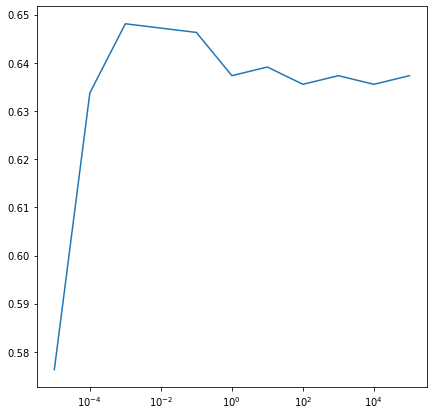

In [32]:
plt.figure(figsize = (7,7))
plt.plot(C_range, accuracy)
plt.xscale('log')